# Day 06: 9th July 2025

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


df = pd.read_csv("areaPriceDay5.csv")
print(df)

x = df[['area']].to_numpy() # shape (n_samples, 1)
y = df['price'].to_numpy()

#selecting the model
reg = LinearRegression()
reg.fit(x, y)



   area     price
0   800   5180000
1  1100   7190000
2  1500   9820000
3  1800  12100000
4  2200  14900000


LinearRegression()

In [2]:
# Price for area 1650sqft
print("Predicted price for 1650sqft area: ", reg.predict([[1650]]))

Predicted price for 1650sqft area:  [11020496.74267101]


In [3]:
reg.intercept_

-456677.5244299695

In [4]:
reg.coef_

array([6955.86319218])

\[
\\( \hat{y} \\) = \\( \beta_0 \\)+ \\( \beta_1 \\) x
\]

In [5]:
# Price for area 1650sqft (𝑦̂  =  𝛽0 + 𝛽1x) 
y = reg.intercept_  + reg.coef_*(1650)
y

array([11020496.74267101])

# Multiple linear regression in machine learning
- Multiple linear regression (MLR) is a supervised learning algorithm that aims to predict a continuous **dependent variable** (also known as the **target** or response variable) based on the values of two or more **independent variables** (also known as **features** or predictors).

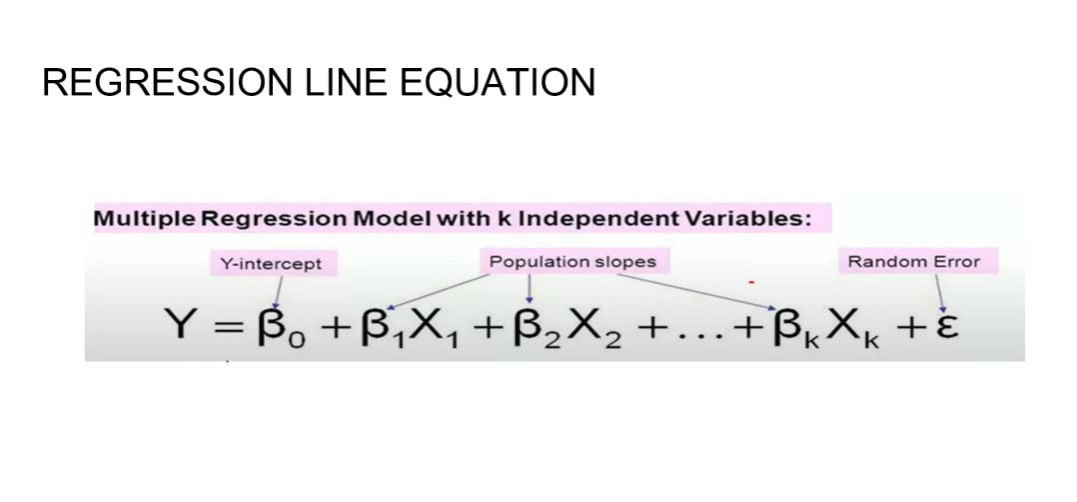

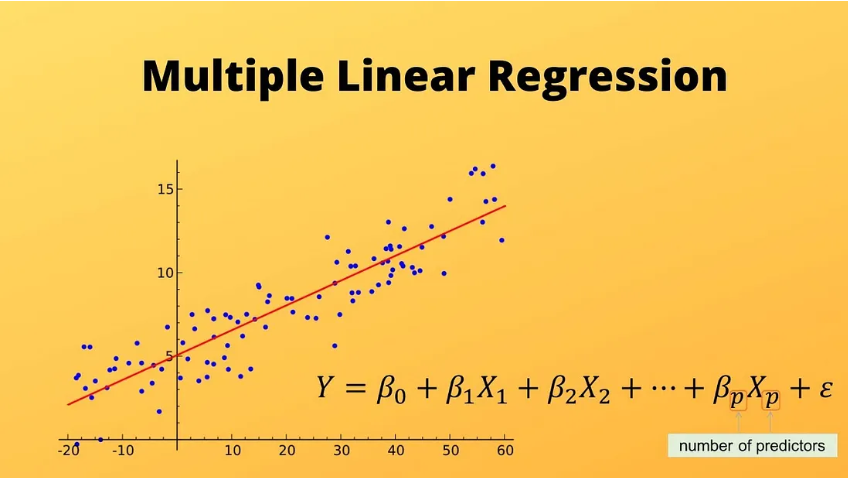

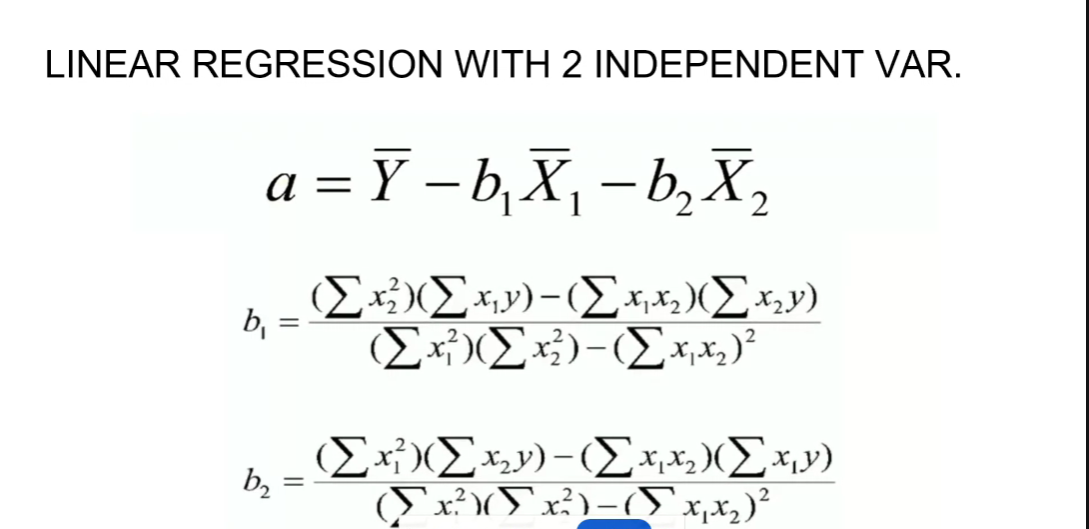

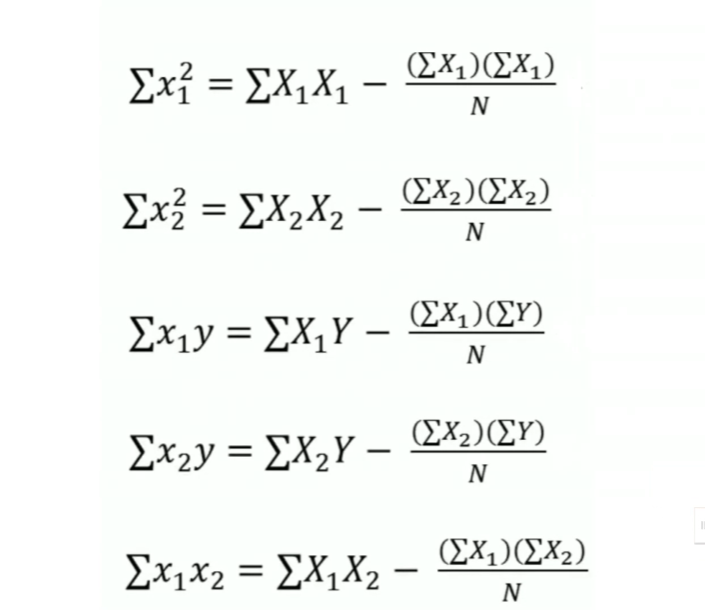

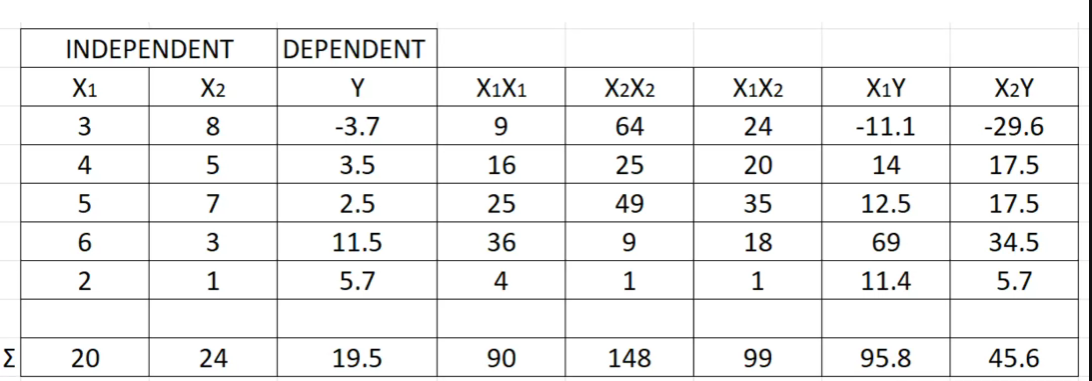

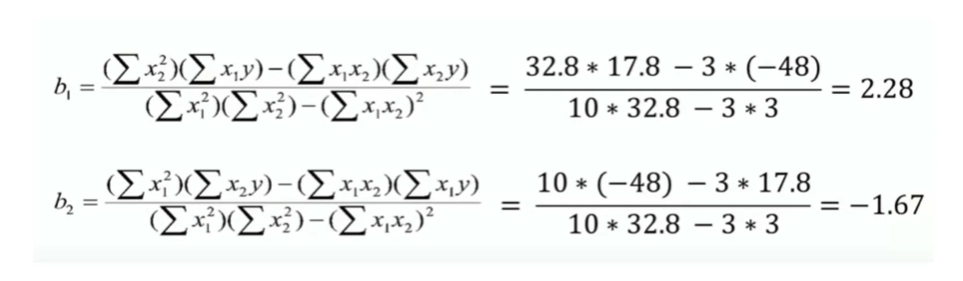

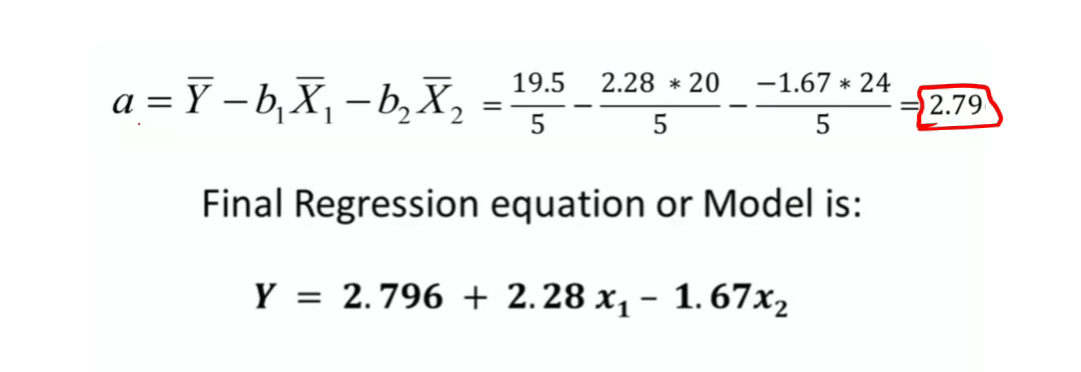

In [6]:
from IPython.display import Image, display

image_files = ["images/MLR1.png","images/MLRD.png", 
               "images/MLR2.png", "images/MLR3.png",
               "images/MLR4.png","images/MLR5.png","images/MLR6.png"]
for img in image_files:
    display(Image(filename=img, width=480))


## Home Work: 9th July 2025

### 🌟 1. Simple Linear Regression
**Dataset:** Auto MPG (predict miles per gallon from weight)

Linear Regression: MPG ~ Weight
Intercept: 47.20052642755209
Coefficient: -0.007903610385225603
RMSE: 4.20635094464854
Predicted MPG: 21.118612156307602


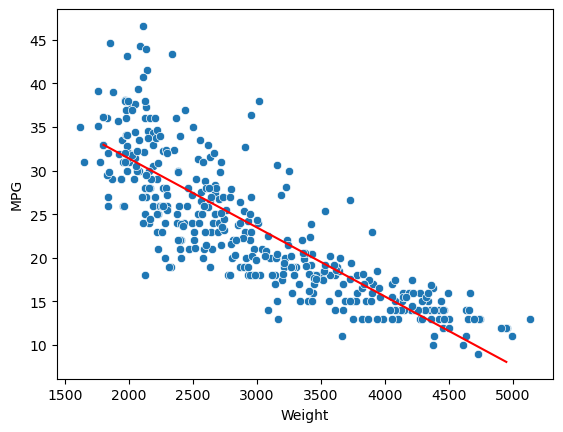

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Load Auto MPG dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
cols = ["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model_Year","Origin","Car_Name"]
df1 = pd.read_csv(url, names=cols, na_values='?', comment='\t', sep='\s+')
df1 = df1.dropna()

# Simple Linear Regression: MPG ~ Weight
X = df1[["Weight"]]
y = df1["MPG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
y_pred = model_lin.predict(X_test)

print("Linear Regression: MPG ~ Weight")
print("Intercept:", model_lin.intercept_)
print("Coefficient:", model_lin.coef_[0])
print("RMSE:", root_mean_squared_error(y_test, y_pred))

sns.scatterplot(x="Weight", y="MPG", data=df1)
sns.lineplot(x=X_test["Weight"], y=y_pred, color='red')

new_df = pd.DataFrame({'Weight': [3300]})
prediction = model_lin.predict(new_df[['Weight']])
print("Predicted MPG:", prediction[0])

For a car weighing 3,300 lbs, the predicted MPG is calculated as:

$$
\hat{Y} = 47.20 + (-0.00790) \times 3300 \approx 21.12\text{ MPG}
$$

This means a car weighing around 3,300 lbs is expected to get approximately **21 MPG** according to my model.


### 🌟 2. Multiple Linear Regression
**Dataset:** Boston Housing (predict median home value from multiple features)



In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import numpy as np
import pandas as pd

# Load data
california = fetch_california_housing()
X_full = pd.DataFrame(california.data, columns=california.feature_names)
y_full = pd.Series(california.target, name='MedHouseValue')

# Select 2 features for MLR
X = X_full[['MedInc', 'AveRooms']]
y = y_full
print(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

# Results
print(f"Intercept: {model.intercept_:.4f}")
print("Coefficients:", dict(zip(X.columns, model.coef_)))
print(f"RMSE: {rmse:.4f}")

# Define the input data
input_data = [[7.2574, 8.288136]]

# Convert to DataFrame with the same column names as the training data
input_df = pd.DataFrame(input_data, columns=['MedInc', 'AveRooms'])

# Make the prediction
y_pred = model.predict(input_df)
print("Predicted MedHouseValue:", y_pred[0])

       MedInc  AveRooms
0      8.3252  6.984127
1      8.3014  6.238137
2      7.2574  8.288136
3      5.6431  5.817352
4      3.8462  6.281853
...       ...       ...
20635  1.5603  5.045455
20636  2.5568  6.114035
20637  1.7000  5.205543
20638  1.8672  5.329513
20639  2.3886  5.254717

[20640 rows x 2 columns]
Intercept: 0.5973
Coefficients: {'MedInc': 0.4362608864728618, 'AveRooms': -0.04017160872638347}
RMSE: 0.8379
Predicted MedHouseValue: 3.430439780418422


## ✅ Summary – Day 06 (9th July 2025)

1. Implemented **Simple Linear Regression (SLR)** to predict house prices using a custom dataset (areaPriceDay5.csv).

2. Explored **Multiple Linear Regression (MLR)** conceptually with visual aids to show how multiple predictors affect a target variable.

3. Applied SLR on Auto MPG dataset to predict fuel efficiency based on vehicle weight.

4. Predicted MPG for a new input (3300 lbs). Used California Housing dataset to build an MLR model for predicting median house values using multiple features.

5. Displayed Mathematical intuition, coefficients, intercept, and evaluated using RMSE.